In [1]:
#the first file was getting too large, so I split it into two files

#first create great plotting approrach, then test it on many approaches!

# plot creation

/home/sat4017/miniforge3/envs/prot_basics/lib/python3.12/site-packages/seaborn/_base.py:1599: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


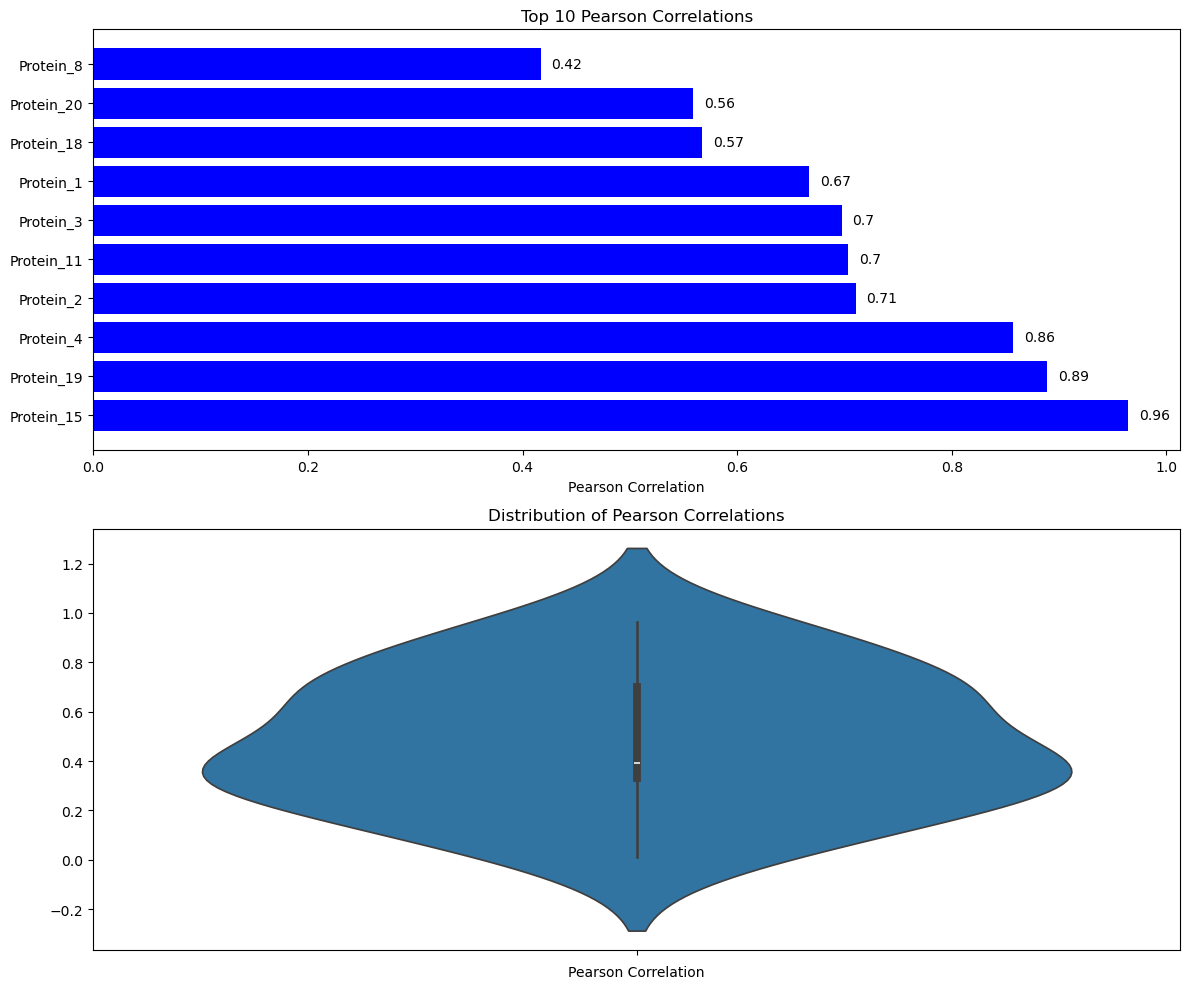

In [2]:
#creating the plotting approach
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we will make a 2x1 subplot, what this plot does is it will have the top plot be a bar plot showing the mse and names of the 20 best models
#then the bottom plot will be a violin plot showing the overall distribution of MSE and R2 values

# Dummy data
correlation_values = np.random.rand(20)
protein_names = [f"Protein_{i}" for i in range(1, 21)]

# Sort by correlation
sorted_indices = np.argsort(np.abs(correlation_values))[::-1]
top_10_indices = sorted_indices[:10]
top_10_correlations = correlation_values[top_10_indices]
top_10_proteins = [protein_names[i] for i in top_10_indices]

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Top subplot: Horizontal Bar Plot for Top 10 Correlations
axes[0].barh(top_10_proteins, top_10_correlations, color='blue')
axes[0].set_xlabel('Pearson Correlation')
axes[0].set_title('Top 10 Pearson Correlations')

# Add text labels
for i, v in enumerate(top_10_correlations):
    axes[0].text(v + 0.01, i, str(round(v, 2)), color='black', verticalalignment='center')

# Bottom subplot: Violin Plot for Distribution of Correlations
sns.violinplot(ax=axes[1], y=correlation_values, orient='h')
axes[1].set_xlabel('Pearson Correlation')
axes[1].set_title('Distribution of Pearson Correlations')

plt.tight_layout()
plt.show()


(<Figure size 1000x1000 with 4 Axes>,
 array([[<Axes: title={'center': 'Feature 967 (MSE: 0.4879, R2: 0.5332)'}, xlabel='True Value', ylabel='Predicted Value'>,
         <Axes: title={'center': 'Feature 997 (MSE: 0.5105, R2: 0.4910)'}, xlabel='True Value', ylabel='Predicted Value'>],
        [<Axes: title={'center': 'Feature 946 (MSE: 0.5207, R2: 0.4795)'}, xlabel='True Value', ylabel='Predicted Value'>,
         <Axes: title={'center': 'Feature 537 (MSE: 0.5355, R2: 0.4649)'}, xlabel='True Value', ylabel='Predicted Value'>]],
       dtype=object))

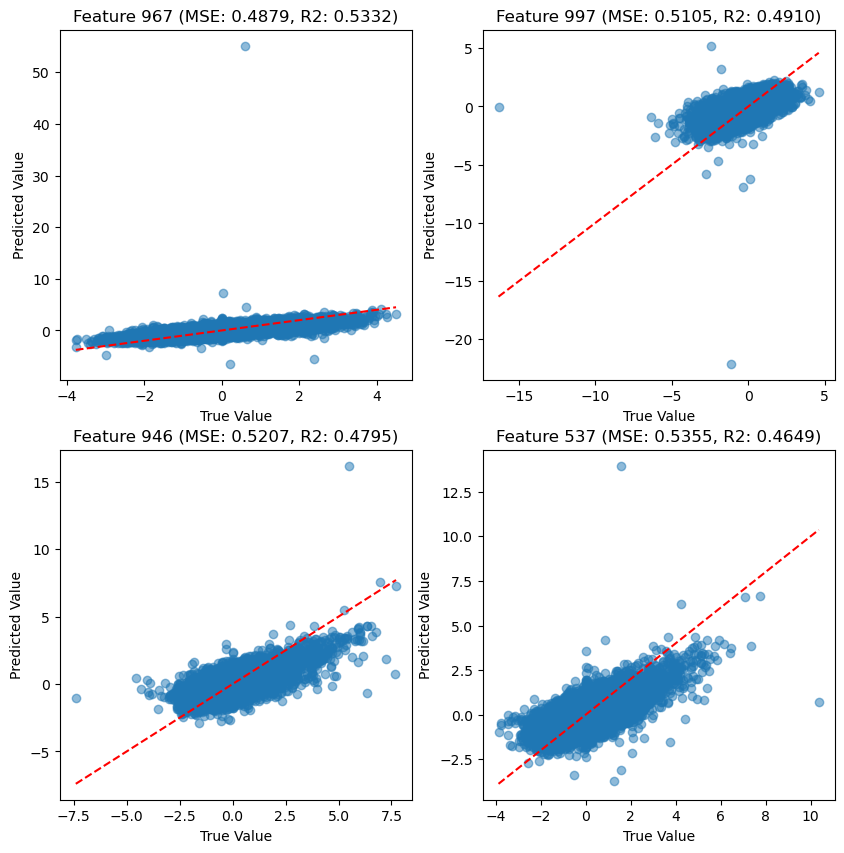

In [3]:
#that's a basic plot, but we will now do it with our actual data
from utils import *
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
dataloder = LoadData(impute='mean')
m = dataloder.m
p = dataloder.p
cv = CV(m,p)
fold_list = cv.folds(n = 5, random_state = 42)

#KNN algorithm is a little slow, but we do have it
for i in range(len(fold_list)):
    #get the indices
    test_idx = fold_list[i]
    #get the data
    m_train = np.delete(m, test_idx, axis = 0) #axis 0 deletes the rows with the test_idx as we hope
    m_test = m[test_idx,:]
    p_train = np.delete(p, test_idx, axis = 0)
    p_test = p[test_idx,:]
    #predict the data
    reg = Ridge(alpha=0.1, random_state=42).fit(m_train, p_train)
    pred = reg.predict(m_test)
    #save out the data
    cv.save_out(pred, i)

# mse = np.argsort(np.mean((cv.predict - p) ** 2, axis=0))[:4]
mse = np.argsort(mean_squared_error(p, cv.predict, multioutput='raw_values'))[:4]
# lowest_mse = np.argsort(mse)[:4]
cv.idx_plot(mse)

(<Figure size 1000x1000 with 4 Axes>,
 array([[<Axes: title={'center': 'Feature 967 (MSE: 0.4854, R2: 0.5358)'}, xlabel='True Value', ylabel='Predicted Value'>,
         <Axes: title={'center': 'Feature 946 (MSE: 0.5129, R2: 0.4872)'}, xlabel='True Value', ylabel='Predicted Value'>],
        [<Axes: title={'center': 'Feature 997 (MSE: 0.5171, R2: 0.4852)'}, xlabel='True Value', ylabel='Predicted Value'>,
         <Axes: title={'center': 'Feature 537 (MSE: 0.5408, R2: 0.4604)'}, xlabel='True Value', ylabel='Predicted Value'>]],
       dtype=object))

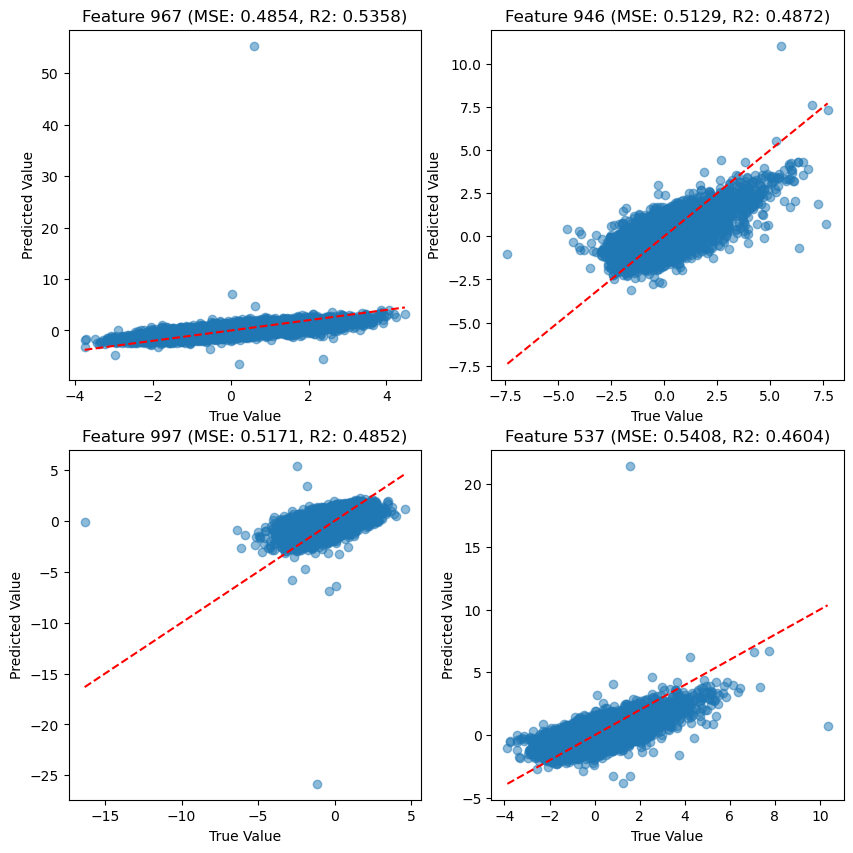

In [4]:
#but now with KNN imputation
dataloder = LoadData(impute='KNN')
m = dataloder.m
p = dataloder.p
cv = CV(m,p)
fold_list = cv.folds(n = 5, random_state = 42)

#KNN algorithm is a little slow, but we do have it
for i in range(len(fold_list)):
    #get the indices
    test_idx = fold_list[i]
    #get the data
    m_train = np.delete(m, test_idx, axis = 0) #axis 0 deletes the rows with the test_idx as we hope
    m_test = m[test_idx,:]
    p_train = np.delete(p, test_idx, axis = 0)
    p_test = p[test_idx,:]
    #predict the data
    reg = Ridge(alpha=0.1, random_state=42).fit(m_train, p_train)
    pred = reg.predict(m_test)
    #save out the data
    cv.save_out(pred, i)

# mse = np.argsort(np.mean((cv.predict - p) ** 2, axis=0))[:4]
mse = np.argsort(mean_squared_error(p, cv.predict, multioutput='raw_values'))[:4]
# lowest_mse = np.argsort(mse)[:4]
cv.idx_plot(mse)

/home/sat4017/miniforge3/envs/prot_basics/lib/python3.12/site-packages/seaborn/_base.py:1599: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


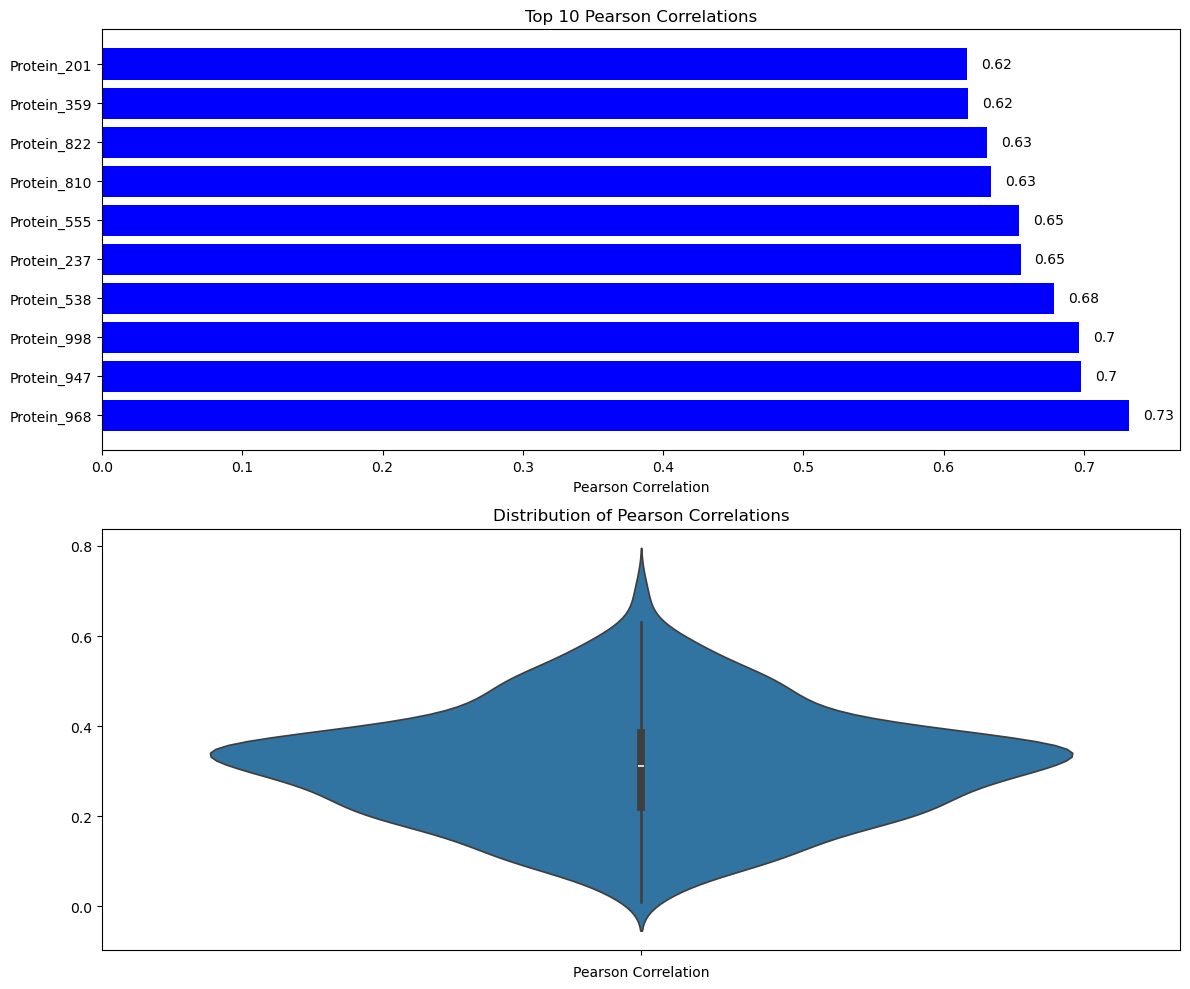

In [7]:
#now let's put it into this plot, the results are actually reasonable, and similar features numbers, may be the same features from before, but no names yet
#first find the pearson correlation for each column of cv.predict
from scipy.stats import pearsonr
correlation_values = []
for i in range(cv.predict.shape[1]):
    correlation_values.append(pearsonr(cv.predict[:,i], p[:,i])[0])

correlation_values = np.array(correlation_values)
protein_names = [f"Protein_{i}" for i in range(1, len(correlation_values)+1)]

sorted_indices = np.argsort(np.abs(correlation_values))[::-1]
top_10_indices = sorted_indices[:10]
top_10_correlations = correlation_values[top_10_indices]
top_10_proteins = [protein_names[i] for i in top_10_indices]

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Top subplot: Horizontal Bar Plot for Top 10 Correlations
axes[0].barh(top_10_proteins, top_10_correlations, color='blue')
axes[0].set_xlabel('Pearson Correlation')
axes[0].set_title('Top 10 Pearson Correlations')

# Add text labels
for i, v in enumerate(top_10_correlations):
    axes[0].text(v + 0.01, i, str(round(v, 2)), color='black', verticalalignment='center')

# Bottom subplot: Violin Plot for Distribution of Correlations
sns.violinplot(ax=axes[1], y=correlation_values, orient='h')
axes[1].set_xlabel('Pearson Correlation')
axes[1].set_title('Distribution of Pearson Correlations')

plt.tight_layout()
plt.show()

# now test the training loop done with the class

In [1]:
import numpy as np
from utils import *
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
dataloder = LoadData(impute='mean')
m = dataloder.m
p = dataloder.p
cv = CV(m,p)
fold_list = cv.folds(n = 5, random_state = 42)

#now we use the inbuilt trian loop instead of defining my own
model = Ridge(alpha=0.1, random_state=42)
predicts = cv.train_loop(model)


In [2]:
print(predicts.shape)

(25818, 1039)


/home/sat4017/miniforge3/envs/prot_basics/lib/python3.12/site-packages/seaborn/_base.py:1599: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


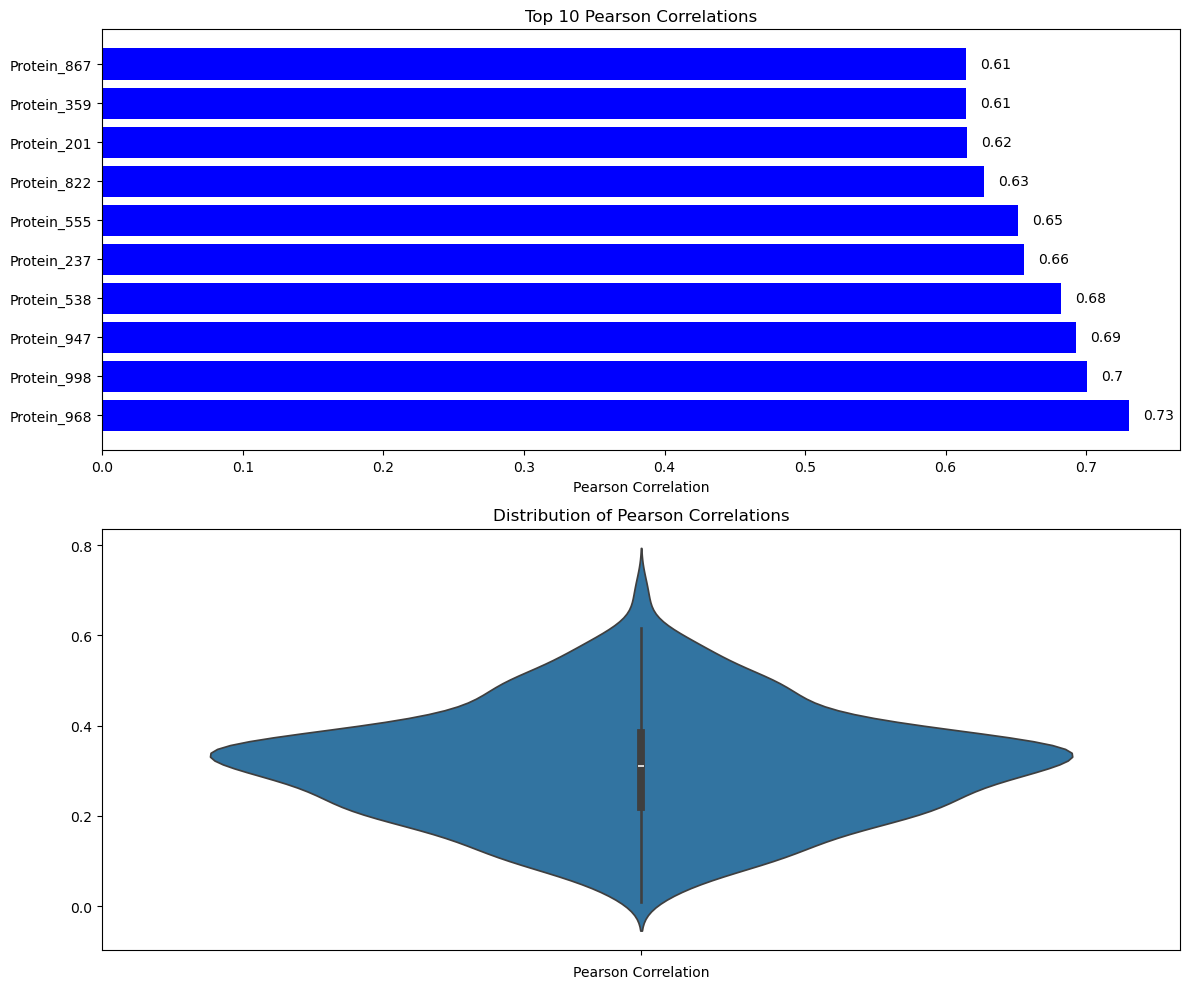

In [4]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
correlation_values = []
for i in range(cv.predict.shape[1]):
    correlation_values.append(pearsonr(cv.predict[:,i], p[:,i])[0])

correlation_values = np.array(correlation_values)
protein_names = [f"Protein_{i}" for i in range(1, len(correlation_values)+1)]

sorted_indices = np.argsort(np.abs(correlation_values))[::-1]
top_10_indices = sorted_indices[:10]
top_10_correlations = correlation_values[top_10_indices]
top_10_proteins = [protein_names[i] for i in top_10_indices]

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Top subplot: Horizontal Bar Plot for Top 10 Correlations
axes[0].barh(top_10_proteins, top_10_correlations, color='blue')
axes[0].set_xlabel('Pearson Correlation')
axes[0].set_title('Top 10 Pearson Correlations')

# Add text labels
for i, v in enumerate(top_10_correlations):
    axes[0].text(v + 0.01, i, str(round(v, 2)), color='black', verticalalignment='center')

# Bottom subplot: Violin Plot for Distribution of Correlations
sns.violinplot(ax=axes[1], y=correlation_values, orient='h')
axes[1].set_xlabel('Pearson Correlation')
axes[1].set_title('Distribution of Pearson Correlations')

plt.tight_layout()
plt.show()

#this is identical, perfect!

# updating the plots

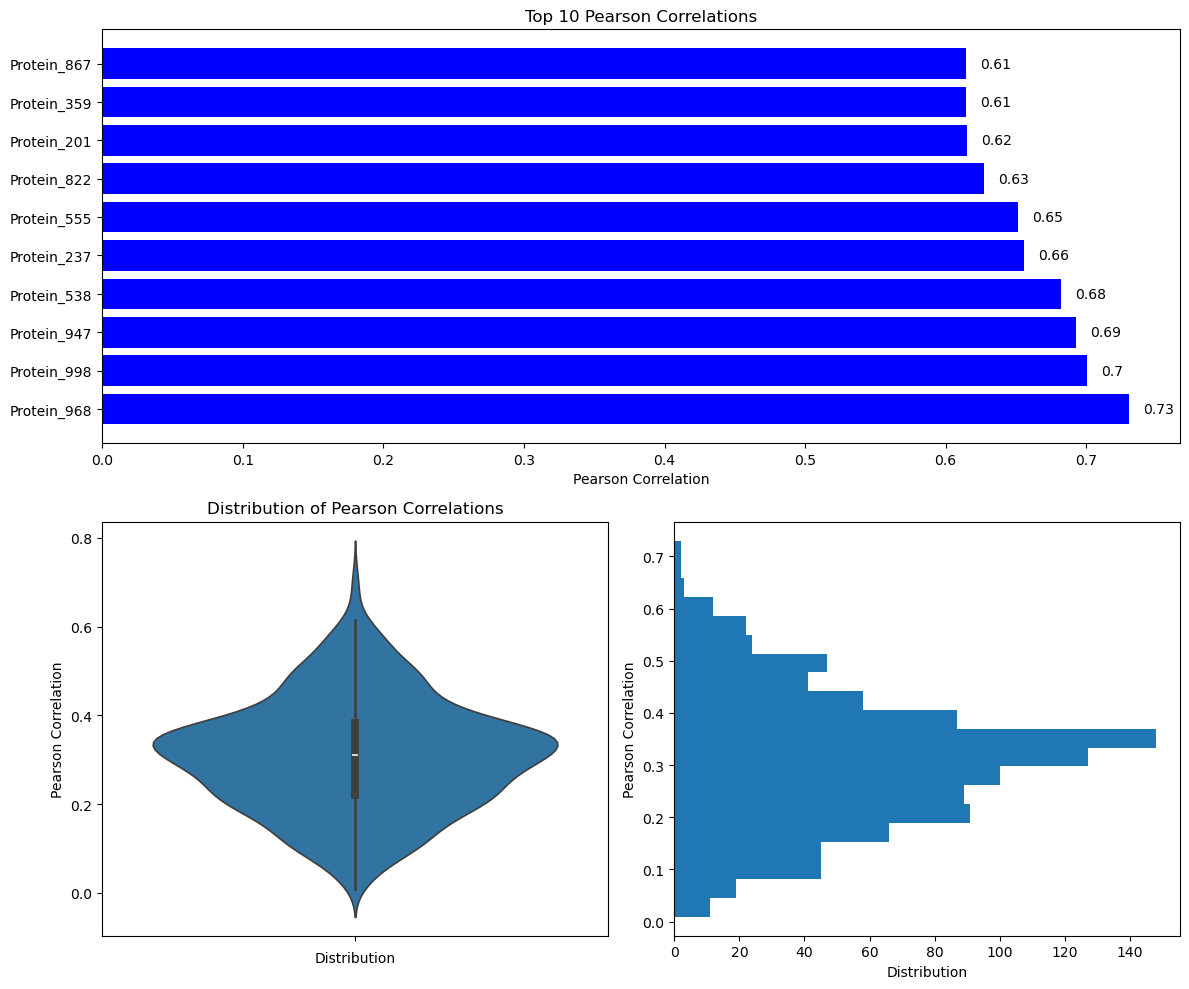

In [11]:
#now, we will do the same thing, but will update the plots

#we want to do this subplot but split the bottom plot into 2

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create a figure
fig = plt.figure(figsize=(12, 10))

# Create a GridSpec object
gs = gridspec.GridSpec(2, 2)  # 3 rows and 2 columns

# Create subplots
ax1 = fig.add_subplot(gs[0, :])  # First row, spanning all columns
ax2 = fig.add_subplot(gs[1:, 0])  # Second and third rows, first column
ax3 = fig.add_subplot(gs[1:, 1])  # Second and third rows, second column

#fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Top subplot: Horizontal Bar Plot for Top 10 Correlations
ax1.barh(top_10_proteins, top_10_correlations, color='blue')
ax1.set_xlabel('Pearson Correlation')
ax1.set_title('Top 10 Pearson Correlations')

# Add text labels
for i, v in enumerate(top_10_correlations):
    ax1.text(v + 0.01, i, str(round(v, 2)), color='black', verticalalignment='center')

# Bottom subplot: Violin Plot for Distribution of Correlations
sns.violinplot(ax=ax2, y=correlation_values)
ax2.set_xlabel('Distribution')
ax2.set_ylabel('Pearson Correlation')
ax2.set_title('Distribution of Pearson Correlations')

#now we do a histogram instead and make it horizontal
ax3.hist(correlation_values, bins = 20, orientation = 'horizontal')
ax3.set_xlabel('Distribution')
ax3.set_ylabel('Pearson Correlation')
ax3.set_title('Distribution of Pearson Correlations')

# Show the plot
plt.tight_layout()  # Optional, but helps to ensure the subplots fit into the figure area.
plt.show()

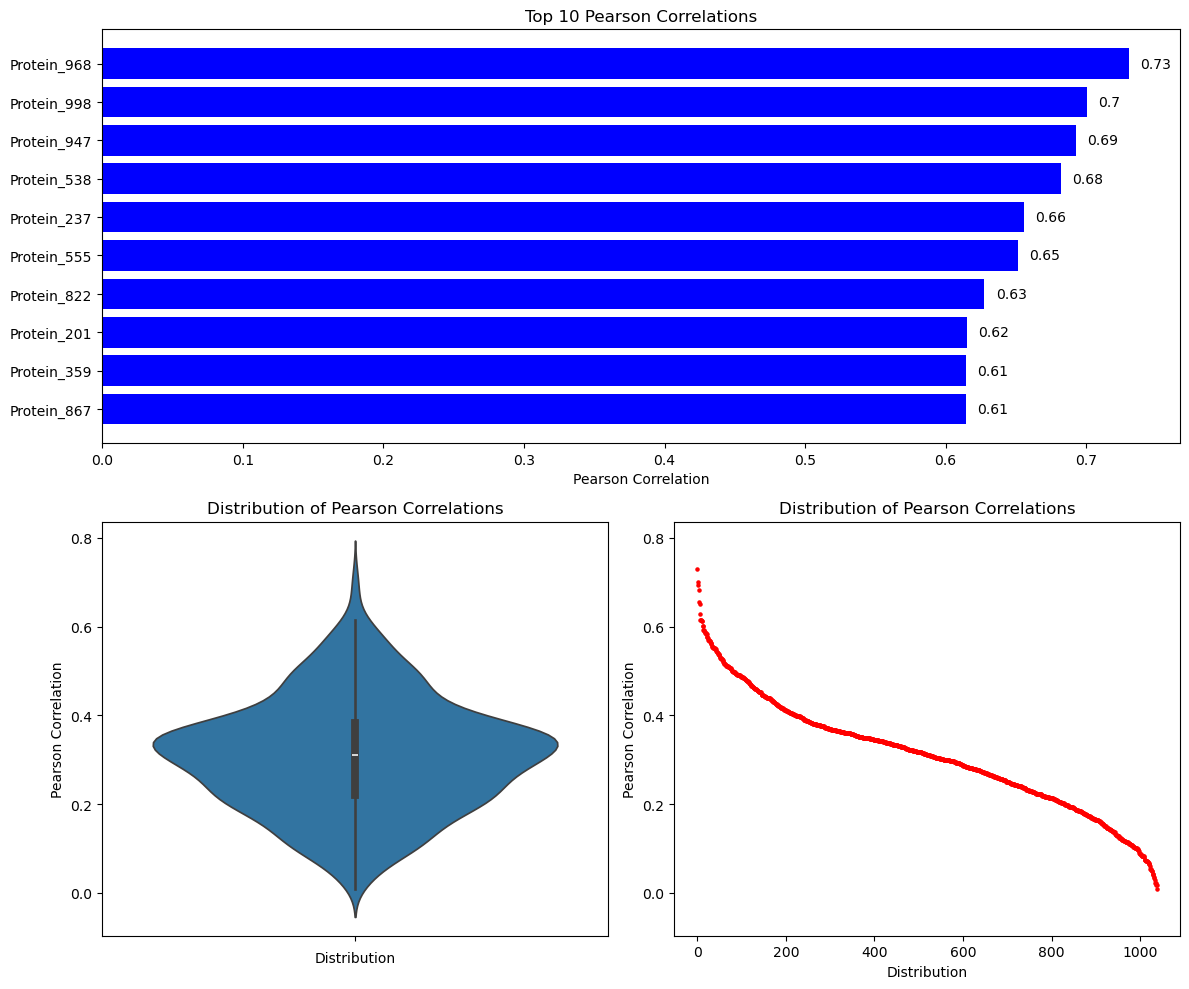

In [21]:
fig = plt.figure(figsize=(12, 10))

# Create a GridSpec object
gs = gridspec.GridSpec(2, 2)  # 3 rows and 2 columns

# Create subplots
ax1 = fig.add_subplot(gs[0, :])  # First row, spanning all columns
ax2 = fig.add_subplot(gs[1:, 0])  # Second and third rows, first column
ax3 = fig.add_subplot(gs[1:, 1])  # Second and third rows, second column

#fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Top subplot: Horizontal Bar Plot for Top 10 Correlations
ax1.barh(top_10_proteins[::-1], top_10_correlations[::-1], color='blue')
ax1.set_xlabel('Pearson Correlation')
ax1.set_title('Top 10 Pearson Correlations')

# Add text labels
for i, v in enumerate(top_10_correlations[::-1]):
    ax1.text(v + 0.008, i, str(round(v, 2)), color='black', verticalalignment='center')

# Bottom subplot: Violin Plot for Distribution of Correlations
sns.violinplot(ax=ax2, y=correlation_values)
ax2.set_xlabel('Distribution')
ax2.set_ylabel('Pearson Correlation')
ax2.set_title('Distribution of Pearson Correlations')
ylim = ax2.get_ylim()

#now we do a scatter plot ofo the pearson correlations that is ordered
sorted_indices = np.argsort(correlation_values)[::-1]
sorted_correlations = correlation_values[sorted_indices]
sorted_proteins = [protein_names[i] for i in sorted_indices]
ax3.scatter(range(len(sorted_correlations)), sorted_correlations, s=5, c='red')
ax3.set_xlabel('Distribution')
ax3.set_ylabel('Pearson Correlation')
ax3.set_title('Distribution of Pearson Correlations')
ax3.set_ylim(ylim)

axes = [ax1, ax2, ax3]

# Show the plot
plt.tight_layout()  # Optional, but helps to ensure the subplots fit into the figure area.
plt.show()

# getting protein names

In [1]:
#we will add this to the CV class, but we need a way to get the protein names in so that we can show the high correlations

#so let's start by finding the file and downloading it
import csv

protein_dict = {}

with open('/home/sat4017/prot_project/protein_coding143.tsv', 'r') as file:
    reader = csv.reader(file, delimiter='\t')
    next(reader)
    for row in reader:
        key = int(row[0])  # Converting the key to integer
        value = row[1].split(';')  # Splitting the string by ';' to get a list
        protein_dict[key] = value

print(protein_dict)


{1: ['A1BG', 'Alpha-1B-glycoprotein'], 2: ['AAMDC', 'Mth938 domain-containing protein'], 3: ['AARSD1', 'Alanyl-tRNA editing protein Aarsd1'], 4: ['ABCA2', 'ATP-binding cassette sub-family A member 2'], 5: ['ABHD14B', 'Protein ABHD14B'], 6: ['ABL1', 'Tyrosine-protein kinase ABL1'], 7: ['ABO', 'Histo-blood group ABO system transferase'], 8: ['ABRAXAS2', 'BRISC complex subunit Abraxas 2'], 9: ['ACAA1', '3-ketoacyl-CoA thiolase, peroxisomal'], 10: ['ACADM', 'Medium-chain specific acyl-CoA dehydrogenase, mitochondrial'], 11: ['ACADSB', 'Short/branched chain specific acyl-CoA dehydrogenase, mitochondrial'], 12: ['ACAN', 'Aggrecan core protein'], 13: ['ACE', 'Angiotensin-converting enzyme'], 14: ['ACE2', 'Angiotensin-converting enzyme 2'], 15: ['ACHE', 'Acetylcholinesterase'], 16: ['ACOT13', 'Acyl-coenzyme A thioesterase 13'], 17: ['ACOX1', 'Peroxisomal acyl-coenzyme A oxidase 1'], 18: ['ACP1', 'Low molecular weight phosphotyrosine protein phosphatase'], 19: ['ACP5', 'Tartrate-resistant acid 

In [2]:
import pandas as pd
prot = pd.read_csv(f'/home/sat4017/prot_project/UKBB_300K_Overlapping_OLINK.csv', index_col = 0)
prot.head()

,1693,1719,1733,1732,1731,1730,1729,1723,1721,1696,...,1311,1312,1285,1259,1272,1281,1282,1284,795,1605
eid,,,,,,,,,,,,,,,,,,,,,
1000048,1.2716,-0.0034,0.58190,1.1194,-1.46535,1.97285,-0.53150,2.05680,1.6603,-0.72730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000072,0.1365,-0.2222,1.12845,0.6091,1.77295,2.01985,1.13115,-1.13275,-0.5480,0.89030,...,-0.03710,0.24505,1.09155,-0.4994,-0.15355,0.3532,0.0992,-0.75705,NaN,NaN
1000256,0.8185,0.6949,0.95770,0.7030,1.54085,-0.68005,-0.00330,0.46510,0.8178,0.64680,...,-0.07845,-0.09300,1.11655,0.0780,-0.19885,-0.3219,-0.3613,-0.06520,-0.1723,0.2618
1000364,-0.1250,0.1200,-0.43900,-0.7983,0.49570,-0.53430,1.91835,-0.47320,-2.7653,-0.37545,...,0.08990,-0.08850,-0.19915,-0.5214,0.13150,-0.1563,-0.4712,-0.17490,0.1964,-0.6225
1000700,-0.2756,0.0914,0.52820,0.8408,1.36460,2.26490,-0.03675,-0.43010,1.2305,0.77695,...,0.08490,0.15560,0.79965,-0.0608,-0.39470,-1.2725,0.3913,0.06670,-0.2589,-0.1950


In [7]:
cols = prot.columns
print(list(cols))

['1693', '1719', '1733', '1732', '1731', '1730', '1729', '1723', '1721', '1696', '1718', '1717', '1711', '1710', '1706', '1705', '1698', '1682', '1645', '1633', '1634', '1637', '1638', '1639', '1641', '1642', '1644', '1680', '1653', '1656', '1662', '1663', '1669', '1670', '1673', '1632', '1891', '1837', '1911', '1910', '1909', '1908', '1903', '1897', '1893', '1827', '1871', '1865', '1855', '1850', '1849', '1847', '1843', '1832', '1804', '1751', '1752', '1763', '1767', '1780', '1783', '1798', '1803', '1745', '1813', '1817', '1818', '1822', '1823', '1824', '1825', '1842', '1629', '1480', '1452', '1455', '1458', '1461', '1462', '1463', '1469', '1477', '1446', '1481', '1488', '1499', '1501', '1503', '1512', '1513', '1449', '1417', '1400', '1403', '1408', '1409', '1413', '1414', '1415', '1416', '1399', '1418', '1421', '1432', '1435', '1441', '1443', '1444', '1514', '1594', '1568', '1578', '1579', '1581', '1582', '1583', '1584', '1586', '1555', '1603', '1610', '1612', '1617', '1622', '1625',

In [1]:
#and now load it in
from utils import LoadData
dataloder = LoadData(impute='mean')
m = dataloder.m
p = dataloder.p
p_cols = dataloder.p_cols
print(len(p_cols))
print(p.shape)

1039
(25818, 1039)


In [2]:
print(p_cols)

Index(['1693', '1719', '1733', '1732', '1730', '1729', '1721', '1718', '1717',
       '1711',
       ...
       '2076', '2078', '1215', '1220', '1314', '1307', '1311', '1312', '1281',
       '1284'],
      dtype='object', length=1039)


# final test for pipeline

In [1]:
#now test from scratch including changes to cv

from utils import *
from sklearn.linear_model import Ridge
dataloder = LoadData(impute='mean')
m = dataloder.m
p = dataloder.p
p_cols = dataloder.p_cols
p_dict = dataloder.p_dict
cv = CV(m,p, p_cols, p_dict)
fold_list = cv.folds(n = 5, random_state = 42)

In [2]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1, random_state=42)
predicts = cv.train_loop(model)

In [3]:
p_dict[1565]

['LDLR', 'Low-density lipoprotein receptor']

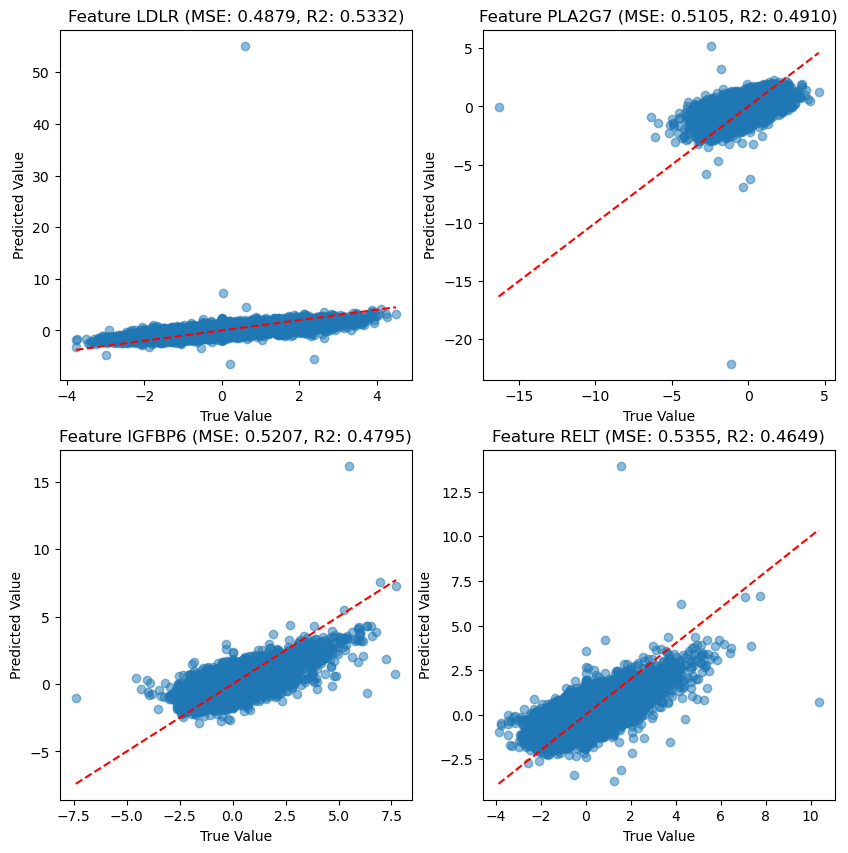

In [4]:
from sklearn.metrics import mean_squared_error
fig,axs = cv.idx_plot(feature_list = np.argsort(mean_squared_error(p, cv.predict, multioutput='raw_values'))[:4])

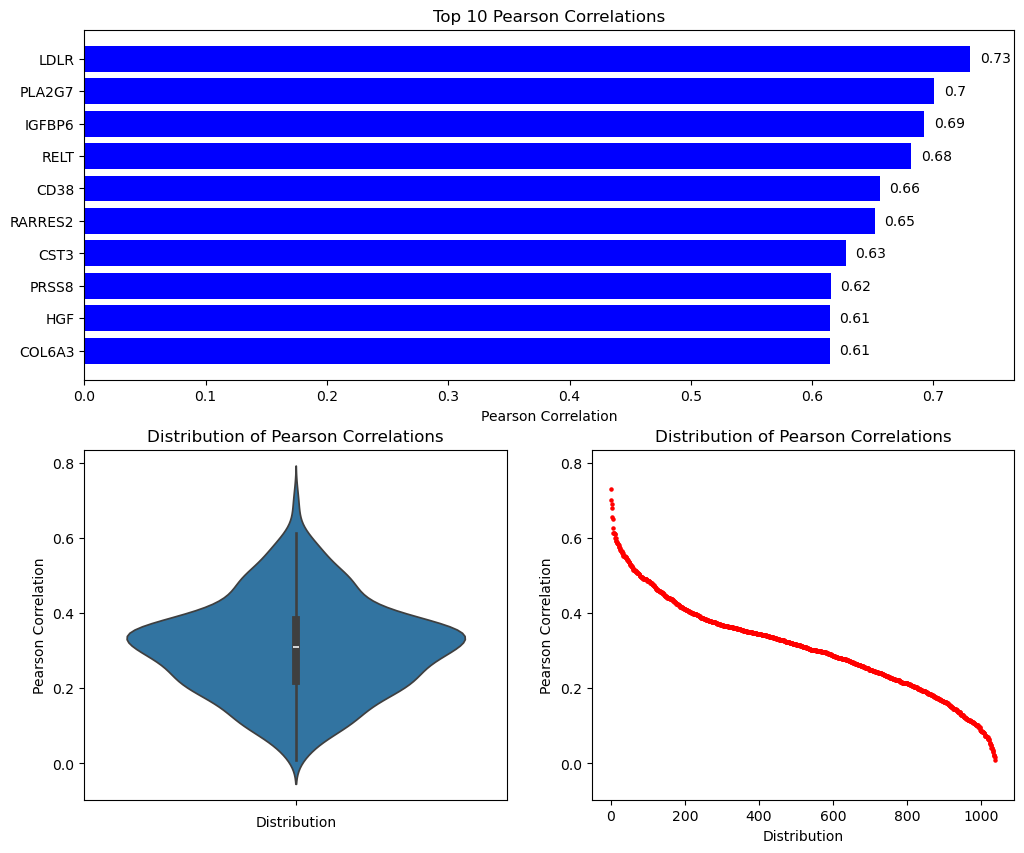

In [12]:
#finally the summary plot]
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
correlation_values = []
for i in range(cv.predict.shape[1]):
    correlation_values.append(pearsonr(cv.predict[:,i], p[:,i])[0])
    
#now plot it
fig,axs = cv.pred_summary_plot(np.array(correlation_values))

In [11]:
sorted_indices = np.argsort(np.abs(correlation_values))[::-1]
top_10_indices = sorted_indices[:10]
print(top_10_indices)

top_10_correlations = correlation_values[top_10_indices]

[967 997 946 537 236 554 821 200 358 866]


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
#the final thing we will do is create a run_pipeline_1 notebook that will run the pipeline for all the different models
#also use knn imputation

# test save out and load features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

from utils import *

dataloder = LoadData(impute='mean')
m = dataloder.m
p = dataloder.p
p_cols = dataloder.p_cols
p_dict = dataloder.p_dict
cv = CV(m,p,p_cols,p_dict)
fold_list = cv.folds(n = 5, random_state = 42)

In [2]:
#now linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
predicts = cv.train_loop(model)

Training Folds: 100%|██████████| 5/5 [00:07<00:00,  1.47s/it]


In [3]:
cv.save_file('test_file.np')

In [6]:
#now load in the data
cv.predict = None
cv.load_file('test_file.np.npy')
print(cv.predict.shape)

(25818, 1039)
